### Naive Bayes Classifier Task
### 문장에서 느껴지는 감정 예측
##### 다중 분류(Multiclass Classification)
- 비대면 심리 상담사로서 메세지를 전달한 환자에 대한 감정 데이터를 수집했다.
- 각 메세지 별로 감정이 표시되어 있다.
- 미래에 동일한 메세지를 보내는 환자에게 어떤 심리 치료가 적합할 수 있는지 알아보기 위한 모델을 구축한다.

In [102]:
import pandas as pd

feel_df = pd.read_csv('./datasets/feeling.csv')
feel_df

,message;feeling
0,im feeling quite sad and sorry for myself but ...
1,i feel like i am still looking at a blank canv...
2,i feel like a faithful servant;love
3,i am just feeling cranky and blue;anger
4,i can have for a treat or if i am feeling fest...
...,...
17995,i just had a very brief time in the beanbag an...
17996,i am now turning and i feel pathetic that i am...
17997,i feel strong and good overall;joy
17998,i feel like this was such a rude comment and i...


In [103]:
# 결측치 확인
feel_df.isna().sum()

message;feeling    0
dtype: int64

In [104]:
# ; 기준으로 나눠주기 위해 타입 확인
feeling = feel_df.iloc[:,-1]
print(type(feeling))

<class 'pandas.core.series.Series'>


In [105]:
# ; 기준으로 메시지와 감정 분할
feel_df[['message','feeling']] = feel_df['message;feeling'].str.split(';',expand=True)
feel_df

,message;feeling,message,feeling
0,im feeling quite sad and sorry for myself but ...,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant;love,i feel like a faithful servant,love
3,i am just feeling cranky and blue;anger,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling fest...,i can have for a treat or if i am feeling festive,joy
...,...,...,...
17995,i just had a very brief time in the beanbag an...,i just had a very brief time in the beanbag an...,sadness
17996,i am now turning and i feel pathetic that i am...,i am now turning and i feel pathetic that i am...,sadness
17997,i feel strong and good overall;joy,i feel strong and good overall,joy
17998,i feel like this was such a rude comment and i...,i feel like this was such a rude comment and i...,anger


In [106]:
# message;feeling 컬럼 삭제
feel_df = feel_df.drop(columns=['message;feeling'], axis=1)

In [107]:
feel_df

,message,feeling
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
17995,i just had a very brief time in the beanbag an...,sadness
17996,i am now turning and i feel pathetic that i am...,sadness
17997,i feel strong and good overall,joy
17998,i feel like this was such a rude comment and i...,anger


In [108]:
# Target으로 이름 변경
feel_df['Target'] = feel_df['feeling']
feel_df

,message,feeling,Target
0,im feeling quite sad and sorry for myself but ...,sadness,sadness
1,i feel like i am still looking at a blank canv...,sadness,sadness
2,i feel like a faithful servant,love,love
3,i am just feeling cranky and blue,anger,anger
4,i can have for a treat or if i am feeling festive,joy,joy
...,...,...,...
17995,i just had a very brief time in the beanbag an...,sadness,sadness
17996,i am now turning and i feel pathetic that i am...,sadness,sadness
17997,i feel strong and good overall,joy,joy
17998,i feel like this was such a rude comment and i...,anger,anger


In [109]:
feel_df = feel_df.drop(labels=['feeling'],axis=1)
feel_df

,message,Target
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
17995,i just had a very brief time in the beanbag an...,sadness
17996,i am now turning and i feel pathetic that i am...,sadness
17997,i feel strong and good overall,joy
17998,i feel like this was such a rude comment and i...,anger


In [110]:
# LabelEncoding 작업 진행 (안해도 동일하게 나왔음)
from sklearn.preprocessing import LabelEncoder

feel_encoder = LabelEncoder()
targets = feel_encoder.fit_transform(feel_df.loc[:, 'Target'])
feel_df['Target'] = targets
feel_df

,message,Target
0,im feeling quite sad and sorry for myself but ...,4
1,i feel like i am still looking at a blank canv...,4
2,i feel like a faithful servant,3
3,i am just feeling cranky and blue,0
4,i can have for a treat or if i am feeling festive,2
...,...,...
17995,i just had a very brief time in the beanbag an...,4
17996,i am now turning and i feel pathetic that i am...,4
17997,i feel strong and good overall,2
17998,i feel like this was such a rude comment and i...,0


In [111]:
# train_test_split으로 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(feel_df.message,
                feel_df.Target,
                stratify=feel_df.Target,
                test_size=0.2,
                random_state=124)

In [112]:
# 파이프라인 구축
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

m_nb_pipe = Pipeline([('count_vectorizer', CountVectorizer()), ('multinomial_NB', MultinomialNB())])
m_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomial_NB', MultinomialNB())])

In [113]:
prediction = m_nb_pipe.predict(X_test)


In [114]:
prediction

array([4, 2, 4, ..., 4, 2, 4])

In [115]:
m_nb_pipe.score(X_test, y_test)

0.7536111111111111

In [116]:
m_nb_pipe.predict([feel_df.iloc[17995].message])

array([4])

In [117]:
feel_encoder.classes_[m_nb_pipe.predict(X_test)]

array(['sadness', 'joy', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype=object)

In [118]:
feel_df.Target.value_counts()

Target
2    6066
4    5216
0    2434
1    2149
3    1482
5     653
Name: count, dtype: int64

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과 micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다.)
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다.)
# 타겟 데이터의 비중이 많이 차이난다면, micro 방식을 사용하는 것이 바람직하다.

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

In [120]:
prediction = m_nb_pipe.predict(X_test)

오차 행렬
[[ 288    4   79    1  115    0]
 [  20  224   81    1  104    0]
 [   4    3 1152    7   47    0]
 [   5    3  167   74   47    0]
 [   5    3   67    1  967    0]
 [   2   16   68    0   37    8]]
정확도: 0.7536, 정밀도: 0.7536, 재현율: 0.7536, F1: 0.7536
################################################################################


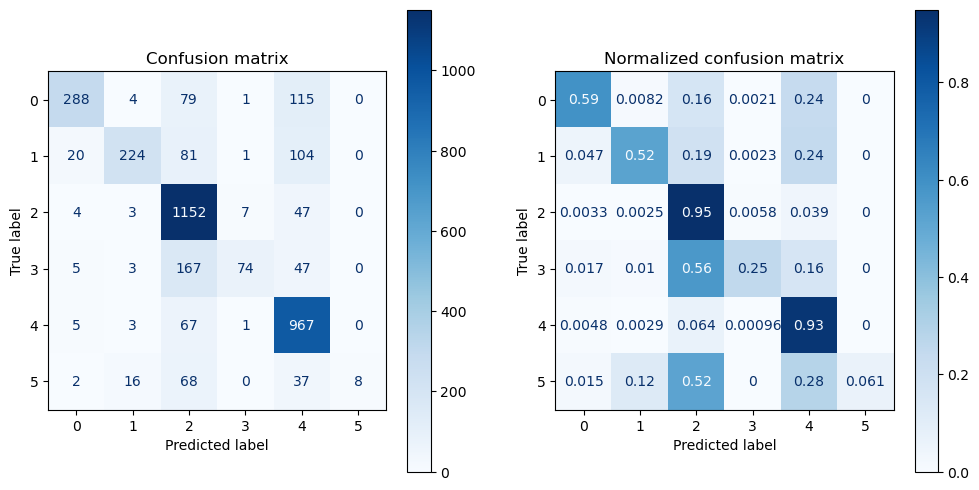

In [121]:
get_evaluation(y_test, prediction, m_nb_pipe, X_test)

#### 정리
위의 오차 행렬을 보면, 3과 5에 대한 예측률이 좋지 않다. 이는 타겟 데이터의 불균형 문제로 판단된다.  
언더 샘플링을 통해 타겟 데이터의 비중을 맞춰주면 T<sub>n</sub>이 높아질 것으로 보인다.

In [122]:
feel_df

,message,Target
0,im feeling quite sad and sorry for myself but ...,4
1,i feel like i am still looking at a blank canv...,4
2,i feel like a faithful servant,3
3,i am just feeling cranky and blue,0
4,i can have for a treat or if i am feeling festive,2
...,...,...
17995,i just had a very brief time in the beanbag an...,4
17996,i am now turning and i feel pathetic that i am...,4
17997,i feel strong and good overall,2
17998,i feel like this was such a rude comment and i...,0


In [123]:
feel_df.Target.value_counts()

Target
2    6066
4    5216
0    2434
1    2149
3    1482
5     653
Name: count, dtype: int64

In [124]:
# 언더 샘플링
anger = feel_df[feel_df.Target == 0].sample(653, random_state=124)
fear = feel_df[feel_df.Target == 1].sample(653, random_state=124)
joy = feel_df[feel_df.Target == 2].sample(653, random_state=124)
love = feel_df[feel_df.Target == 3].sample(653, random_state=124)
sadness = feel_df[feel_df.Target == 4].sample(653, random_state=124)
surprise = feel_df[feel_df.Target == 5]


under_f_df = pd.concat([anger, fear, joy, love, sadness, surprise]).reset_index(drop=True)

In [125]:
under_f_df.Target.value_counts()

Target
0    653
1    653
2    653
3    653
4    653
5    653
Name: count, dtype: int64

In [126]:
# train_test_split으로 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(under_f_df.message,
                under_f_df.Target,
                stratify=under_f_df.Target,
                test_size=0.2,
                random_state=124)

In [127]:
# 파이프라인 구축
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

m_nb_pipe = Pipeline([('count_vectorizer', CountVectorizer()), ('multinomial_NB', MultinomialNB())])
m_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomial_NB', MultinomialNB())])

In [128]:
print(y_test)
print(m_nb_pipe.predict(X_test))

3589    5
655     1
1814    2
4       0
3813    5
       ..
393     0
1957    2
1292    1
2054    3
1015    1
Name: Target, Length: 784, dtype: int32
[5 5 2 0 5 5 4 1 3 1 2 4 2 3 1 1 0 1 4 0 5 0 3 5 4 2 2 3 1 5 3 4 2 5 3 3 3
 1 5 1 3 2 0 4 3 4 3 5 3 3 4 5 4 3 0 5 1 4 1 4 3 4 3 3 5 3 4 2 3 4 5 2 0 5
 2 0 0 2 1 4 4 2 2 4 1 3 0 1 5 5 0 5 3 3 2 2 0 1 1 5 2 3 1 1 3 4 4 3 4 3 4
 0 5 1 2 0 0 5 3 5 3 2 5 2 0 4 3 3 3 0 3 0 1 2 4 5 0 0 0 0 0 0 1 1 1 1 0 0
 2 4 4 2 5 2 3 4 1 1 3 1 5 4 0 1 5 3 2 3 1 0 3 2 1 1 3 1 1 2 2 1 1 3 5 5 3
 1 4 5 4 3 5 3 3 3 1 5 5 1 1 5 5 2 2 5 2 0 1 3 3 3 5 3 2 4 3 3 3 0 1 4 5 1
 4 5 3 0 0 3 0 0 5 0 1 1 5 1 3 5 1 5 3 1 5 1 0 0 1 5 2 2 4 1 4 5 3 0 4 0 0
 2 0 2 0 3 5 3 5 4 4 3 2 5 5 3 5 0 1 2 1 3 0 0 0 1 0 3 3 4 5 0 5 2 0 4 5 0
 3 4 1 1 2 4 3 4 0 5 5 5 3 0 0 1 1 0 5 3 0 1 5 3 5 3 0 0 5 3 2 4 0 5 5 5 0
 3 5 3 3 5 5 2 1 5 4 1 5 1 5 5 0 4 5 2 3 3 2 4 5 5 5 3 3 3 2 4 5 2 0 1 5 5
 1 0 5 2 5 3 2 4 3 1 5 4 5 5 0 1 4 5 0 4 2 4 0 5 5 3 4 5 0 1 3 3 0 3 5 5 1
 0 5 4 2 5 5 1 0 5 5 0 4 

In [129]:
m_nb_pipe.score(X_test, y_test)

0.7117346938775511

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [131]:
prediction = m_nb_pipe.predict(X_test)

오차 행렬
[[ 94   8   6   1  10  11]
 [  8  94   5   6   3  15]
 [  9   7  78  20   8   9]
 [  3   5  13 106   0   4]
 [ 10  11  11  11  76  12]
 [  1   5   4   6   4 110]]
정확도: 0.7117, 정밀도: 0.7140, 재현율: 0.7119, F1: 0.7087
################################################################################


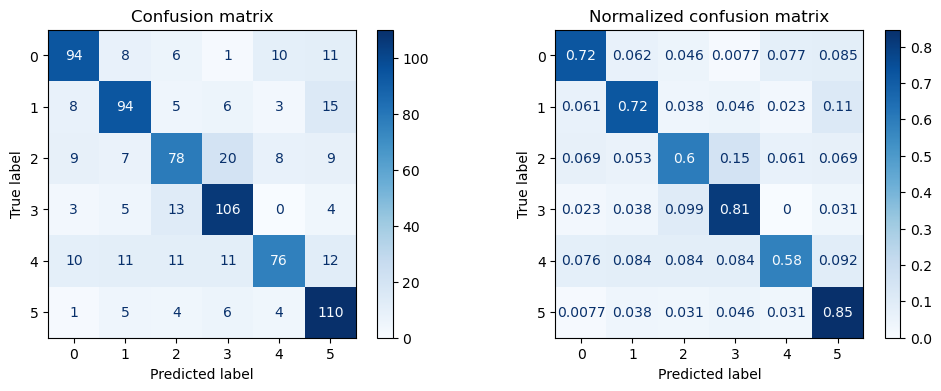

In [132]:
get_evaluation(y_test, prediction, m_nb_pipe, X_test)

언더 샘플링을 통해, 정확도가 상승한 것을 확인할 수 있었다.  
허나 2와 4에 대해 정확도가 떨어졌다.  
이는 언더샘플링으로 샘플의 수가 줄어들어서 발생한 현상인 것을 알 수 있었다.